# Fermi-LAT ANALYSIS

In [1]:
from vtspy import *

## Step 1. Generate a configuration file for Fermipy

In [2]:
ls ./veritas

95127.anasum.fits  95130.anasum.fits  initial.pickle
95128.anasum.fits  analyzed.pickle    obs-index.fits.gz
95129.anasum.fits  hdu-index.fits.gz  simple.pickle


In [3]:
config = JointConfig(files="./veritas/")

2022-06-23 13:53:05 INFO    : -------------------- Info --------------------
2022-06-23 13:53:05 INFO    : target: 1ES1218+304
2022-06-23 13:53:05 INFO    : localization:
2022-06-23 13:53:05 INFO    : 	(ra, dec) : (185.3412470056114, 30.17694222440679)
2022-06-23 13:53:05 INFO    : 	(glat, glon) : (82.73442268671826, 186.3593855387067)
2022-06-23 13:53:06 INFO    : time interval:
2022-06-23 13:53:06 INFO    : 	veritas : 2020-01-01T11:15:10.479 - 2020-01-01T13:15:02.043
2022-06-23 13:53:06 INFO    : 	fermi : 2020-01-01 00:00:00.000 - 2020-01-02 00:00:00.000
2022-06-23 13:53:06 INFO    : ---------------------------------------------
2022-06-23 13:53:06 INFO    : a configuration file (config.yaml) is created.


In [4]:
config.print_config()

2022-06-23 13:53:06 INFO    : 
fermi:
  binning:
    binsperdec: 8
    binsz: 0.08
    coordsys: CEL
    projtype: WCS
    roiwidth: 12
  data:
    evfile: ./fermi/EV00.lst
    ltcube: null
    scfile: ./fermi/SC00.fits
  fileio:
    logfile: ./fermi/log/fermipy.log
    outdir: ./fermi/
    usescratch: false
  gtlike:
    edisp: true
    edisp_disable:
    - isodiff
    - galdiff
    irfs: P8R3_SOURCE_V3
  model:
    catalogs: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
    galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
    isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
    src_roiwidth: 15
  selection:
    dec: 30.17694222440679
    emax: 300000
    emin: 100
    evclass: 128
    evtype: 3
    glat: 82.73442268671826
    glon: 186.3593855387067
    ra: 185.3412470056114
    target: 1ES1218+304
    tmax: 599616005.0
    tmin: 599529605.0
    zmax: 90
veritas:
  background:
    distance: 1.75
    file: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/Hi

## Step 2. Download Fermi-LAT data

In [5]:
dwn = DownloadFermiData(verbosity=1)

2022-06-23 13:53:06 INFO    : Query parameters:
2022-06-23 13:53:06 INFO    :                     coordfield = 185.3412470056114,30.17694222440679
2022-06-23 13:53:06 INFO    :                    coordsystem = J2000
2022-06-23 13:53:06 INFO    :                     shapefield = 15
2022-06-23 13:53:06 INFO    :                      timefield = 599529605.0,599616005.0
2022-06-23 13:53:06 INFO    :                       timetype = MET
2022-06-23 13:53:06 INFO    :                    energyfield = 100,300000
2022-06-23 13:53:06 INFO    :         photonOrExtendedOrNone = Photon
2022-06-23 13:53:06 INFO    :                    destination = query
2022-06-23 13:53:06 INFO    :                     spacecraft = checked
2022-06-23 13:53:38 INFO    : The estimated time is about 8 seconds.
2022-06-23 13:53:44 INFO    : Downloading... https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220623075339F357373F12_PH00.fits
2022-06-23 13:53:45 INFO    : Downloading... https://fermi.gsfc.nasa.gov/FTP/

## Step 3. Analyze the Ferrmi-LAT data

### Initiate fermipy

In [6]:
fermi = FermiAnalysis()

2022-06-23 13:53:47 INFO    : Initialize the Fermi-LAT analysis.
2022-06-23 13:53:52 INFO    : Initial setup and configuration are not found. Performing the data reduction...
/Users/dtak/Software/miniconda3/envs/fermipy/lib/python3.9/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/Users/dtak/Software/miniconda3/envs/fermipy/lib/python3.9/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return 0.5 * (y[ys0] * x[xs0] + y[ys1] * x[xs1]) * log_

In [7]:
fermi.print_model()

2022-06-23 14:30:28 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  13.620  0.000984   1.20     45.02         5.6     
4FGL J1217.9+3007      0.753   1.094  8.88e-05   1.97      7.21         7.2     
4FGL J1225.9+2951      1.038   0.870  5.21e-06   2.35       nan         0.5     
4FGL J1221.5+2814      1.930   0.489  3.63e-05   2.16      3.89         4.5     
4FGL J1231.7+2847      2.641   1.371  2.79e-05   1.99     11.19         2.4     
4FGL J1208.1+3017      2.871   0.414  1.18e-06   1.79       nan         0.1     
4FGL J1220.1+3432      4.378   1.647  3.92e-06   2.07       nan         0.4     
4FGL J1205.8+3321      4.589   0.684  1.45e-06   2.68       nan         0.3     
4FGL J1159.5+2914      4.832   0.061  5.95e-06   2.42      0.12         0.8     
4FGL J1215.1+3513      5.219   0.575  1.41e-06   2.64 

### Check whether the target is in the list

In [8]:
fermi.print_association()

2022-06-23 14:30:28 INFO    : 0) 4FGL J1221.3+3010:['PG 1218+304', '1ES 1218+304']
2022-06-23 14:30:28 INFO    : 1) 4FGL J1217.9+3007:['B2 1215+30', '1ES 1215+303']
2022-06-23 14:30:28 INFO    : 2) 4FGL J1225.9+2951:[]
2022-06-23 14:30:28 INFO    : 3) 4FGL J1221.5+2814:['W Comae']
2022-06-23 14:30:28 INFO    : 4) 4FGL J1231.7+2847:['B2 1229+29']
2022-06-23 14:30:28 INFO    : 5) 4FGL J1208.1+3017:['GB6 J1208+3015']
2022-06-23 14:30:28 INFO    : 6) 4FGL J1220.1+3432:['GB2 1217+348']
2022-06-23 14:30:28 INFO    : 7) 4FGL J1205.8+3321:['SDSS J120542.82+332146.9']
2022-06-23 14:30:28 INFO    : 8) 4FGL J1159.5+2914:['Ton 599', '3EG J1200+2847', 'TON 0599']
2022-06-23 14:30:28 INFO    : 9) 4FGL J1215.1+3513:['7C 1212+3524']
2022-06-23 14:30:28 INFO    : 10) 4FGL J1230.2+2517:['ON 246', 'S3 1227+25']
2022-06-23 14:30:28 INFO    : 11) 4FGL J1224.4+2436:['MS 1221.8+2452']
2022-06-23 14:30:28 INFO    : 12) 4FGL J1212.2+2442:['NVSS J121219+244130']
2022-06-23 14:30:28 INFO    : 13) 4FGL J1241.5+34

In [9]:
fermi.print_target()

2022-06-23 14:30:28 INFO    : Name           : 4FGL J1221.3+3010
Associations   : ['4FGL J1221.3+3010', 'PG 1218+304', '1ES 1218+304']
RA/DEC         :    185.345/    30.168
GLON/GLAT      :    186.417/    82.741
TS             : 45.02
Npred          : 5.61
Flux           : 5.145e-08 +/- 3.21e-08
EnergyFlux     : 0.0009845 +/- 0.000824
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.362e-12 +/-  7.049e-13
b'Index'       :     -1.197 +/-     0.2804
b'Scale'       :       4442 +/-        nan


### Perform a fit

In [10]:
fermi.fit()

2022-06-23 14:31:32 INFO    : Fit successfully (3).
2022-06-23 14:31:33 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:31:33 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:31:33 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:31:44 INFO    : The state is saved as 'simple'. You can load the state by vtspy.VeritasAnalysis('simple').


In [11]:
fermi.print_model()

2022-06-23 14:31:44 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.749   0.00104   1.16     48.83         5.2    *
4FGL J1217.9+3007      0.753   0.742  5.02e-05   2.69     62.52        10.7    *
4FGL J1225.9+2951      1.038   2.446  1.47e-05   2.35     19.17         1.3    *
4FGL J1221.5+2814      1.930   0.387  2.87e-05   2.16      2.90         3.6    *
4FGL J1231.7+2847      2.641   0.405  0.000519   0.77     71.49         1.0    *
4FGL J1208.1+3017      2.871   0.000  5.83e-11   1.79     56.00         0.0    *
4FGL J1220.1+3432      4.378   1.647  3.92e-06   2.07       nan         0.4     
4FGL J1205.8+3321      4.589   0.684  1.45e-06   2.68       nan         0.3     
4FGL J1159.5+2914      4.832   0.061  5.95e-06   2.42      0.12         0.8     
4FGL J1215.1+3513      5.219   0.575  1.41e-06   2.64 

### Remove weak sources except for the target and diffuse bkgs.

In [12]:
fermi.remove_weak_srcs(ts_cut=0.1)
fermi.fit()

2022-06-23 14:31:44 INFO    : 19 sources are deleted.


Drm_Cache::update Measured counts < 0 4FGL J1225.9+2951 27 -8.42318e-12 8.15458e-11
5.78367e-06 3.94045e-05 0.000214079 0.000936295 0.00340753 0.0102318 0.0256222 0.0540636 0.096388 0.143602 0.177852 0.184347 0.160781 0.11847 0.0748312 0.0407656 0.0188055 0.00734414 0.0024502 0.000700138 0.000172128 3.56867e-05 6.19562e-06 9.09766e-07 1.13293e-07 1.19548e-08 1.07197e-09 8.15458e-11 


2022-06-23 14:31:56 INFO    : Fit successfully (3).
2022-06-23 14:31:56 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:31:56 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:31:56 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:32:06 INFO    : The state is saved as 'simple'. You can load the state by vtspy.VeritasAnalysis('simple').


In [13]:
fermi.print_model()

2022-06-23 14:32:06 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.737   0.00104   1.16     46.74         5.2    *
4FGL J1217.9+3007      0.753   0.766  5.01e-05   2.74     62.58        10.7    *
4FGL J1225.9+2951      1.038   2.045   2.3e-05   1.73     21.07         1.1    *
4FGL J1221.5+2814      1.930   0.397  2.95e-05   2.16      2.96         3.7    *
4FGL J1231.7+2847      2.641   0.402  0.000524   0.77     71.40         1.0    *
4FGL J1208.1+3017      2.871   0.000  1.38e-09   1.79     56.00         0.0    *
4FGL J1159.5+2914      4.832   0.061  5.95e-06   2.42      0.12         0.8     
4FGL J1230.2+2517      5.249   0.519  1.87e-05   2.16      1.86         1.9     
isodiff                  ---   1.526    0.0772   2.24      1.63        47.4    *
galdiff                  ---   0.100    0.0266   0.00 

In [14]:
fermi.print_params()

2022-06-23 14:32:06 ERROR   GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J1208.1+3017
   4 Prefactor             0.000484      1.79     1e-05     1e+03     1e-14    *
   5 Index                     1.79  2.42e+03         0         5        -1    *
   6 Scale                 5.65e+03         0  5.65e+03  5.65e+03         1     
4FGL J1217.9+3007
   7 norm                     0.766     0.463     1e-05     1e+03     1e-11    *
   8 alpha                     2.59     0.477        -5         5         1    *
   9 beta                    0.0655     0.245        -2         2         1    *
  10 Eb                    1.07e+03         0  1.07e+03  1.07e+03         1     
4FGL J1221.3+3010
  11 Prefactor                 12.7      6.02     1e-05     1e+03     1e-13    *
  12 Index                     1.16     0.245         0         5        -1    *

### Check TS distribution

In [15]:
fermi.analysis(jobs=["ts"])

2022-06-23 14:32:06 INFO    : Generating a TS map...
2022-06-23 14:32:45 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/ts_pointsource_powerlaw_2.00_tsmap.npy
2022-06-23 14:32:45 INFO    : Generating the TS map is completed.
2022-06-23 14:32:45 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:32:45 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:32:46 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:32:56 INFO    : The state is saved as 'analyzed'. You can load the state by vtspy.VeritasAnalysis('analyzed').


2022-06-23 14:32:56 INFO    : Loading the output file...


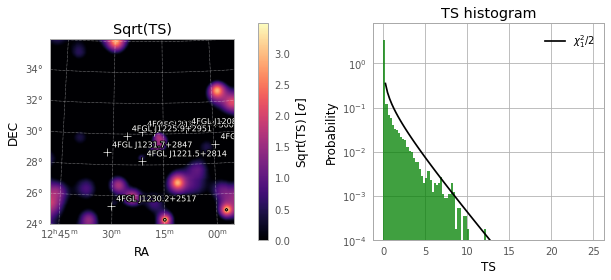

In [16]:
fermi.plot(["sqrt_ts", "ts_hist"])

### Check resid distribution

In [17]:
fermi.analysis(jobs=["resid"])

2022-06-23 14:32:57 INFO    : Generating a residual distribution...
2022-06-23 14:33:06 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/resid_pointsource_powerlaw_2.00_residmap.npy
2022-06-23 14:33:06 INFO    : Generating the residual distribution is completed.
2022-06-23 14:33:06 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:06 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:07 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:17 INFO    : The state is saved as 'analyzed'. You can load the state by vtspy.VeritasAnalysis('analyzed').


2022-06-23 14:33:17 INFO    : Loading the output file...


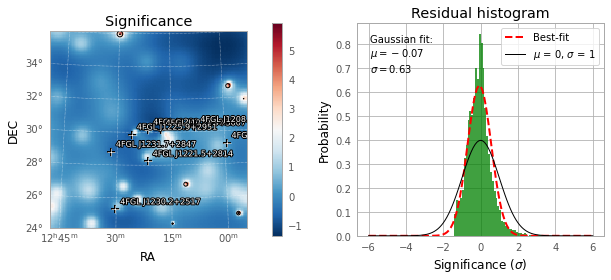

In [18]:
fermi.plot(["sigma", "resid"])

### Calculate SED

In [19]:
fermi.analysis(jobs=["sed"])

2022-06-23 14:33:17 INFO    : Generating a SED... 
2022-06-23 14:33:25 INFO    : Generating the SED is completed.
2022-06-23 14:33:25 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:25 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:25 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-23 14:33:35 INFO    : The state is saved as 'analyzed'. You can load the state by vtspy.VeritasAnalysis('analyzed').


2022-06-23 14:33:35 INFO    : Loading the output file...


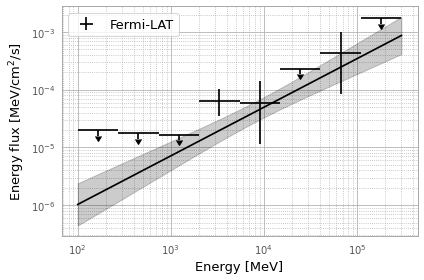

In [20]:
fermi.plot("sed")

## Step 4. Construct dataset for the joint-fit analysis

In [21]:
fermi.construct_dataset()

2022-06-23 14:33:36 INFO    : Loading the Fermi-LAT events...
2022-06-23 14:33:36 INFO    : Loading the Fermi-LAT IRFs...
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-23 14:33:36 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'. [astropy.wcs.wcs]
2022-06-23 14:33:36 WARNING : FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184' from MJDREF.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'.
2022-06-23 14:33:36 INFO    : Loading the Fermi-LAT models...
2022-06-23 14:33:38 INFO    : Ready to perform a gammapy analysis.


### Peek events and irfs

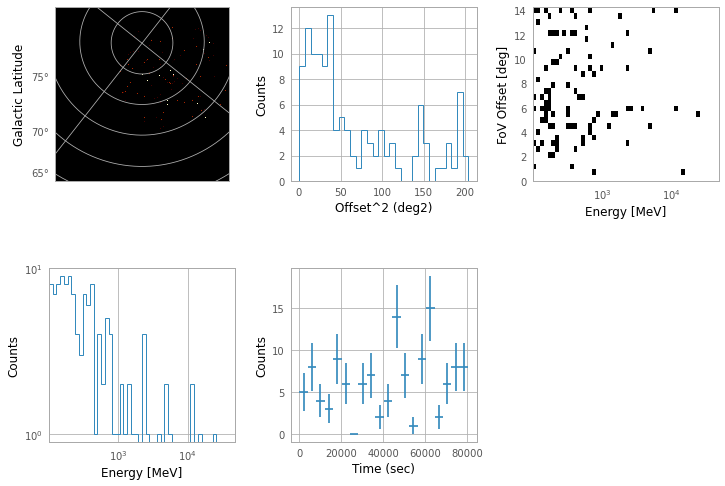

In [22]:
fermi.peek_events()

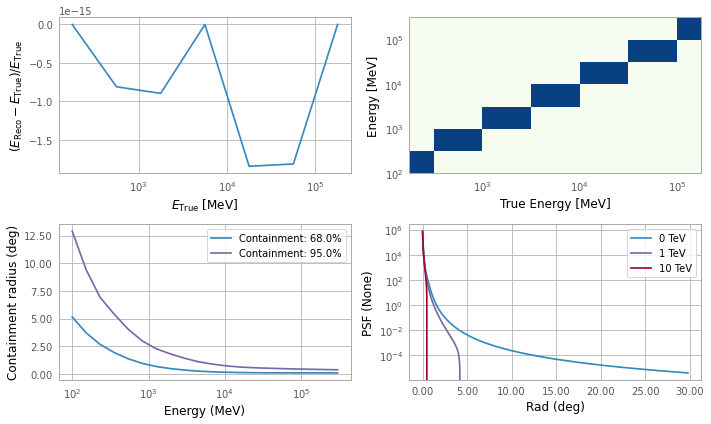

In [23]:
fermi.peek_irfs()

## Bonus. Fit the Fermi-LAT dataset with gammapy 

Note that this will take longer time

In [24]:
from gammapy.modeling import Fit

In [25]:
gfit = Fit()
gfit.run(fermi.datasets)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization failed.
	nfev       : 2467
	total stat : 1015.91

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

2022-06-23 14:41:25 INFO    : Loading the output file...


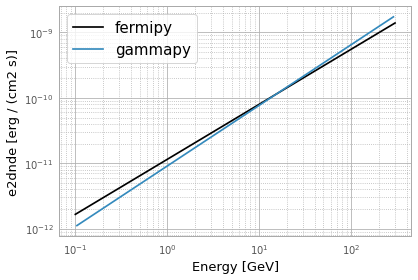

In [26]:
fermi.plot("sed", erg=True, units="GeV", show_flux_points=False, show_band=False, label="fermipy")

gamma_result = fermi.datasets.models[fermi.target_name].spectral_model
gamma_result.plot([100*u.MeV, 300*u.GeV], sed_type="e2dnde", label="gammapy")

plt.legend(fontsize=15)